# INTRODUCTION :

<p style="font-size:13px; font-family:verdana; line-height: 1.7em">We are given a dataset about various books. We are given features such as their <code>Name</code>,<code>Genre</code>,<code>Summary</code>. This is a multi class classification problem. Our main goal here is to predict the <code>Genre</code> of the book based on its <code>Title</code> and <code>Summary</code>.</p>

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">AIM:  Our goal here is to predict the <code>Genre</code> of the book based on its <code>Title</code> and <code>Summary</code>.</p>

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">Importing libaries & DataSet</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

import time
#NLP LIBRARies
import nltk 
import re 

In [2]:
df=pd.read_csv('D:\\datascience\\pojects\\book Genere Prediction\\data.csv')
df1=df.copy()

<div style="font-size:15px; font-family:verdana;"><h3 style="font-family:verdana;">Data Understanding:</h3>

In [3]:
df.head()

,index,title,genre,summary
0,0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...
1,1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ..."
2,2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...
4,4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...



<div style="font-size:15px; font-family:Gill Sans;"><h3 style="font-family:Gill Sans;">Feature Description:</h3>
</div>
<ol>
    <li style="font-family:Gill Sans;"><code style="font-family:Gill Sans;">Index</code> - Index of every row.</li>
    <li style="font-family:Gill Sans;"><code style="font-family:Gill Sans;">Title</code> - Title of the Book .</li>
    <li style="font-family:Gill Sans;"><code style="font-family:Gill Sans;">Genre</code> - Genre of the Book.</li>
    <li style="font-family:Gill Sans;"><code style="font-family:Gill Sans;">Summary</code> - Synopsis of the Book.</li>
</ol>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4657 entries, 0 to 4656
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    4657 non-null   int64 
 1   title    4657 non-null   object
 2   genre    4657 non-null   object
 3   summary  4657 non-null   object
dtypes: int64(1), object(3)
memory usage: 145.7+ KB


In [5]:
discrete_data=['title','genre']

In [6]:
df.describe(include='all')

,index,title,genre,summary
count,4657.000000,4657,4657,4657
unique,NaN,4296,10,4542
top,NaN,Bloodline,thriller,The incredible true story of the women who fou...
freq,NaN,4,1023,3
mean,2328.000000,NaN,NaN,NaN
std,1344.504432,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN
25%,1164.000000,NaN,NaN,NaN
50%,2328.000000,NaN,NaN,NaN
75%,3492.000000,NaN,NaN,NaN


In [7]:
df.shape

(4657, 4)

In [8]:
df.nunique()

index      4657
title      4296
genre        10
summary    4542
dtype: int64

In [9]:
#checking for null values
df.isna().sum()

index      0
title      0
genre      0
summary    0
dtype: int64

In [10]:
for i in discrete_data:
    print(i)
    print(df[i].value_counts())
    print("*"*50)

title
Bloodline                               4
Nemesis                                 4
The Hunger Games                        4
The Enemy                               3
Stone Cold                              3
                                       ..
The Birthday Present                    1
The Case of the Late Pig                1
Black Coffee: A Hercule Poirot Novel    1
A Dark-Adapted Eye                      1
Radiance                                1
Name: title, Length: 4296, dtype: int64
**************************************************
genre
thriller      1023
fantasy        876
science        647
history        600
horror         600
crime          500
romance        111
psychology     100
sports         100
travel         100
Name: genre, dtype: int64
**************************************************


<div style="font-size:20px; font-family:Gill Sans;"><h3 style="font-family:Gill Sans;">EDA:</h3>
</div>

In [11]:
pd.crosstab(df.genre,df.title,margins=True)

title,"""Surely You're Joking, Mr. Feynman!"": Adventures of a Curious Character",'Salem's Lot,"1,000 Places to See Before You Die",12 Rules for Life: An Antidote to Chaos,1491: New Revelations of the Americas Before Columbus,1493: Uncovering the New World Columbus Created,1634: The Bavarian Crisis,1634: The Ram Rebellion,1635: The Tangled Web,1776,...,Zahrah the Windseeker,Zealot: The Life and Times of Jesus of Nazareth,Zen and the Art of Motorcycle Maintenance: An Inquiry Into Values,Zero Day,Zombie,Zoo,Zorro,Zulu Hart,’Salem's Lot,All
genre,,,,,,,,,,,,,,,,,,,,,
crime,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,500
fantasy,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,876
history,0,0,0,0,1,1,0,0,0,1,...,0,1,0,0,0,0,1,1,0,600
horror,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,600
psychology,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,100
romance,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,111
science,1,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,647
sports,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,100
thriller,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1023


In [12]:
pd.crosstab(df.genre,df.summary,margins=True)

summary      "Bud, and Not Buddy" is the story of ten-year old Bud Caldwell, an orphan living in Flint, Michigan in 1936 during the Great Depression. Since the death of his mother, years earlier, Bud has been living in an orphanage, as well as short stints in several foster homes. All he has of his mother are a bag of rocks and a photograph of his momma as a child and fliers that show Herman E. Calloway and his jazz band, the Dusky Devastators of the Depression. The story opens with Bud being placed with a new foster family, the Amoses, where Bud soon meets Todd Amos, their tormenting twelve year old son. After a fight with Todd, Bud is forced to spend the night in the garden shed, and in the morning they would bring him back to the orphanage.In the shed he is stung by hornets. This happens by cutting the hornets' nest after thinking it was a vampire bat and hitting it with a rake. After extricating himself from the shed, Bud takes revenge on Todd by causing him to wet the bed, and with his friend Bugs from the orphanage, finds the Flint Hooverville. Their stay does not last beyond the next morning, when the men and boys attempt to board a freight train heading west and in their absence Hooverville is torched. After this fiasco, Bud determines to seek out Herman E. Calloway, believing the man is his father. With suitcase in hand, Bud starts walking the 120 miles to Grand Rapids, Michigan. Along the way, he is picked up by Lefty Lewis from Grand Rapids, on his way to Flint. Bud tells him that he was running away from his home in Grand Rapids, and Lewis agrees to drive him back to Grand Rapids the following day. Bud stays the night in Lewis' daughter's house and the next morning has breakfast with Lefty, his daughter and her two children. Lefty drives Bud to the club where the Dusky Devastators are currently performing, and Bud manages to convince the band to allow him to stay at their home, despite Calloway's reluctance to acknowledge Bud as his son. The band takes Bud under their collective wing, and he comes with them on tour. After their first concert together, he notices Calloway picking up a rock and writing the date and location of the concert on it. When Bud shows Calloway the rocks that Bud's mother kept, Calloway accuses him of stealing them from his house. The other band members intervene, and upon further questioning, the adults realize that Bud's mother is Calloway's estranged daughter, making Bud his long-lost grandson.  \
genre                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

genre


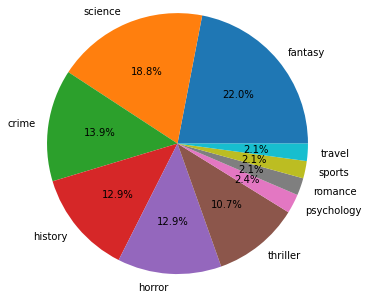

In [13]:
print('genre')
lst=list(df['genre'].value_counts())
lbs=list(df['genre'].unique())
plt.pie(lst,labels=lbs,radius=1.5,autopct="%1.1f%%")
plt.show()

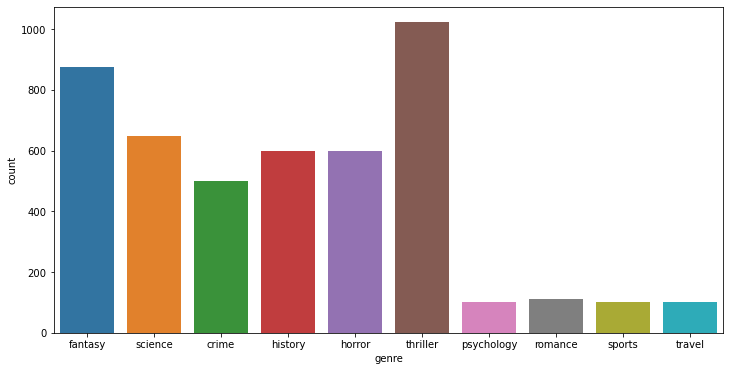

In [14]:
plt.figure(figsize=(12,6))
sn.countplot(x='genre',data=df,width=0.8)
plt.show()

<div style="font-size:20px; font-family:Gill Sans;"><h3 style="font-family:Gill Sans;">Word cloud analysis</h3>
</div>

In [15]:
from wordcloud import WordCloud
def print_wordCloud(genre,summary):
    print(genre)
    wordcloud = WordCloud(width = 400, height = 400, 
                background_color ='white', 
                min_font_size = 10).generate(word)
    plt.figure(figsize = (7, 7), facecolor = 'white', edgecolor='blue') 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

def make_string(genre):
    s = ""
    for row_index,row in df.iterrows():
        if(row['genre'] == genre):
            s+=(row['summary']+' ')
    return s

thriller


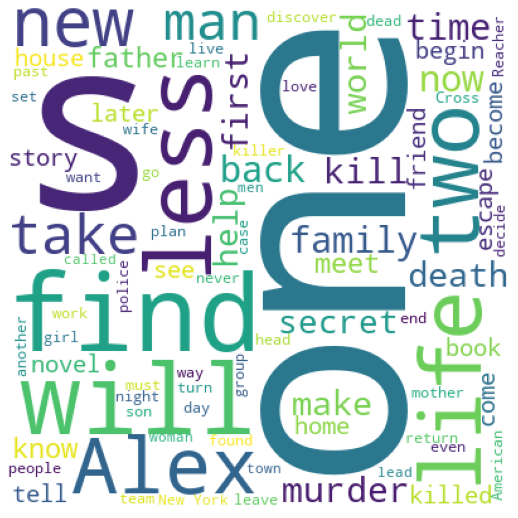

fantasy


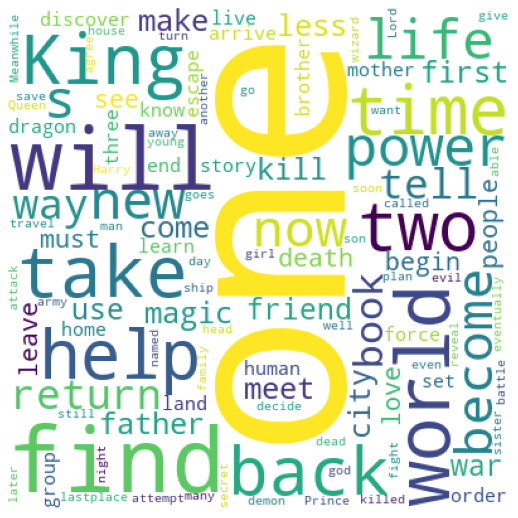

science


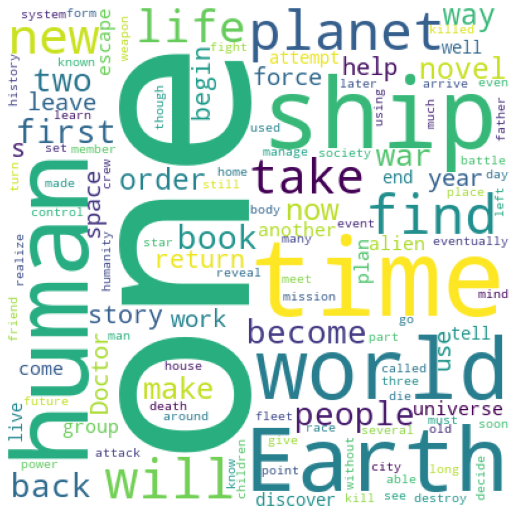

history


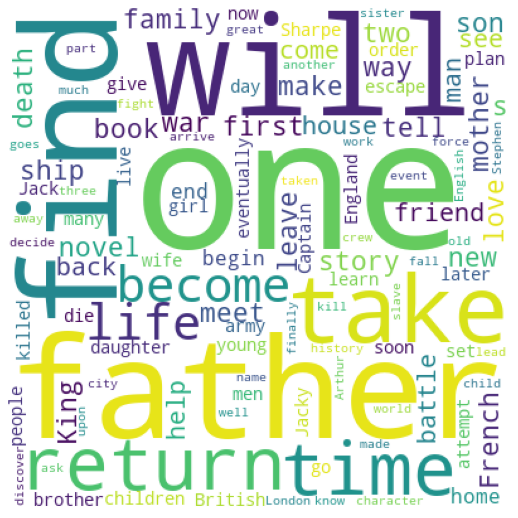

horror


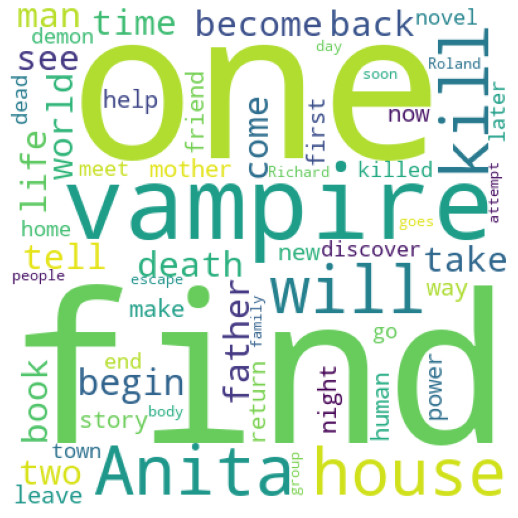

crime


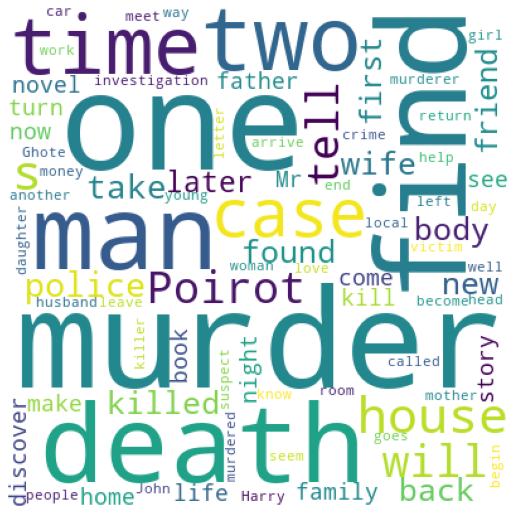

romance


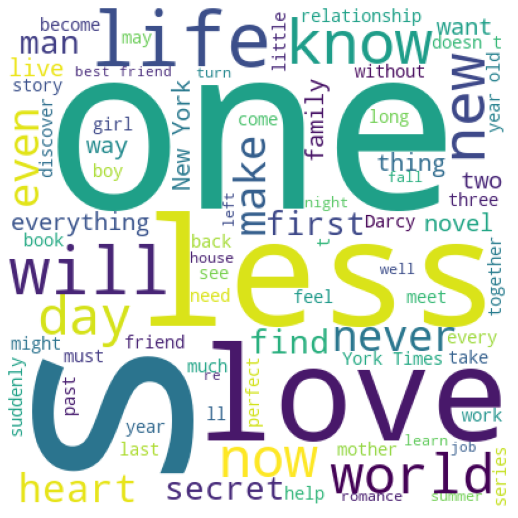

psychology


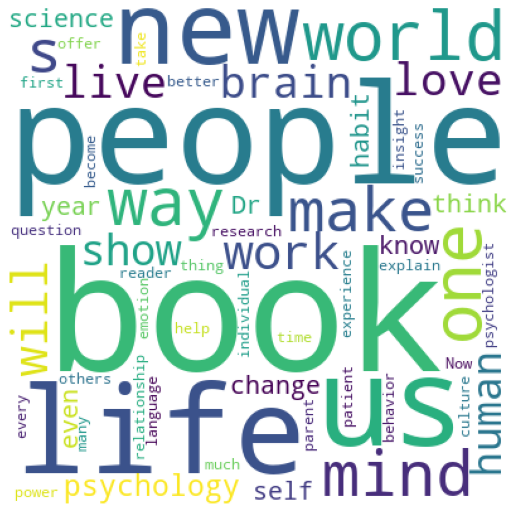

sports


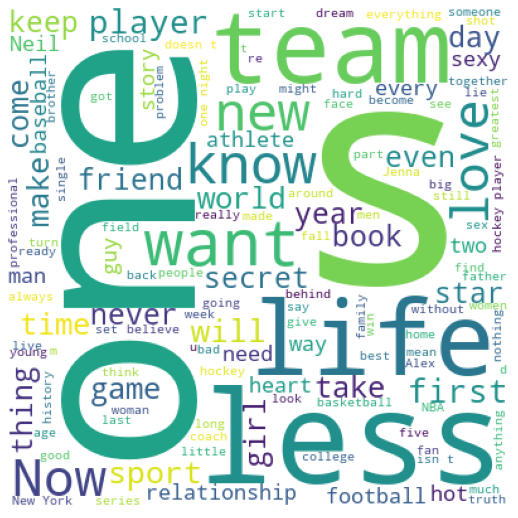

travel


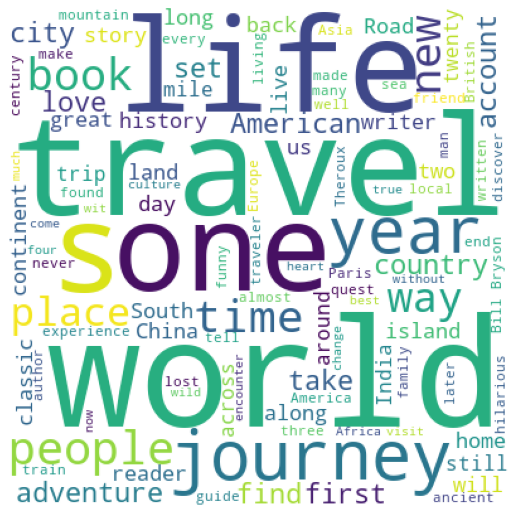

In [16]:

genre = ['thriller','fantasy','science','history','horror','crime','romance',
                                'psychology','sports','travel']
for Genre in genre:
    word = make_string(Genre)
    print_wordCloud(Genre,word)

<div style="font-size:20px; font-family:Gill Sans;"><h3 style="font-family:Gill Sans;">Text Cleaning & removing duplicates values :</h3>
</div>

In [17]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


In [18]:
#We have no missing values in the data. We drop the Index column as it does not help describe the data in any way.
df.drop('index',inplace = True,axis = 1)
df.head()

,title,genre,summary
0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...
1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ..."
2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...
3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...
4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...


In [19]:
#removing duplicates
df.drop_duplicates(inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4640 entries, 0 to 4656
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    4640 non-null   object
 1   genre    4640 non-null   object
 2   summary  4640 non-null   object
dtypes: object(3)
memory usage: 145.0+ KB


In [21]:
#after removing duplicates reordering
df=df.reset_index(0,4640)

In [22]:
lemmatizer=WordNetLemmatizer()
title=[]
for i in range(len(df['title'])):
    rp=re.sub('[^a-zA-Z]'," ",df['title'][i])
    rp=rp.lower()
    rp=rp.split()
    rp=[lemmatizer.lemmatize(word) for word in rp if not word in set(stopwords.words('english'))]
    rp= " ".join(rp)
    title.append(rp)


In [23]:
lemmatizer=WordNetLemmatizer()
summary=[]
for i in range(len(df)):
    rp=re.sub('[^a-zA-Z]'," ",df['summary'][i])
    rp=rp.lower()
    rp=rp.split()
    rp=[lemmatizer.lemmatize(word) for word in rp if not word in set(stopwords.words('english'))]
    rp= " ".join(rp)
    summary.append(rp)

<div style="font-size:20px; font-family:Gill Sans;"><h3 style="font-family:Gill Sans;">Vectorization:</h3>
</div>


<div style="font-size:12px; font-family:Gill Sans;"><h3 style="font-family:Gill Sans;">Here 'summary' will be the input data and 'genre' will be target labels.</h3>
</div>

In [24]:
from sklearn.preprocessing import LabelEncoder
df['genre'] = LabelEncoder().fit_transform(df['genre'])
df

,title,genre,summary
0,Drowned Wednesday,1,Drowned Wednesday is the first Trustee among ...
1,The Lost Hero,1,"As the book opens, Jason awakens on a school ..."
2,The Eyes of the Overworld,1,Cugel is easily persuaded by the merchant Fia...
3,Magic's Promise,1,The book opens with Herald-Mage Vanyel return...
4,Taran Wanderer,1,Taran and Gurgi have returned to Caer Dallben...
...,...,...,...
4635,Hounded,1,"Atticus O’Sullivan, last of the Druids, lives ..."
4636,Charlie and the Chocolate Factory,1,Charlie Bucket's wonderful adventure begins wh...
4637,Red Rising,1,"""I live for the dream that my children will be..."
4638,Frostbite,1,"Rose loves Dimitri, Dimitri might love Tasha, ..."


In [25]:
#Count Vectorizer (Bag of Words)
from sklearn.feature_extraction.text import CountVectorizer
tle=CountVectorizer(binary=True,max_features=30000)
X = tle.fit_transform(summary).toarray()

In [26]:
y = df['genre']

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# Modeling

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm  import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble  import AdaBoostClassifier
from sklearn.ensemble  import GradientBoostingClassifier
from  xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score, recall_score, precision_score, auc, roc_auc_score, roc_curve

from sklearn.metrics import classification_report,plot_confusion_matrix,confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

In [29]:
models = [BernoulliNB(),MultinomialNB(),LogisticRegression(),RandomForestClassifier(),GradientBoostingClassifier(),
        AdaBoostClassifier(),SVC(),KNeighborsClassifier(),XGBClassifier()]

# APPLYING MACHINE LEARNING

In [30]:
Name = []
Accuracy = []
Precision = []
F1_Score = []
Recall = []
Time_Taken = []
for model in models:
    name = type(model).__name__
    Name.append(name)
    model = OneVsRestClassifier(model)
    begin = time.time()
    model.fit(x_train,y_train)
    prediction = model.predict(x_test)
    end = time.time()
    Accuracy.append(accuracy_score(prediction,y_test))
    Precision.append(precision_score(prediction,y_test,average = 'macro'))
    Recall.append(recall_score(prediction,y_test,average = 'macro'))
    F1_Score.append(f1_score(prediction,y_test,average = 'macro'))
    Time_Taken.append(end-begin)
    print(name + ' Successfully Trained')

BernoulliNB Successfully Trained
MultinomialNB Successfully Trained
LogisticRegression Successfully Trained
RandomForestClassifier Successfully Trained
GradientBoostingClassifier Successfully Trained
AdaBoostClassifier Successfully Trained
SVC Successfully Trained
KNeighborsClassifier Successfully Trained
XGBClassifier Successfully Trained


In [31]:
Dict = {'Name':Name,'Accuracy':Accuracy,'Precision_score':Precision,'Recall_score':Recall,
        'F1_score':F1_Score,'Time Taken':Time_Taken}
model_df = pd.DataFrame(Dict)
model_df

,Name,Accuracy,Precision_score,Recall_score,F1_score,Time Taken
0,BernoulliNB,0.427443,0.250037,0.371405,0.256638,15.227472
1,MultinomialNB,0.647989,0.410349,0.442398,0.409547,10.439416
2,LogisticRegression,0.643678,0.577902,0.666080,0.611168,36.100440
3,RandomForestClassifier,0.641523,0.473649,0.658099,0.512825,190.480828
4,GradientBoostingClassifier,0.597701,0.511345,0.586241,0.535276,2716.143334
5,AdaBoostClassifier,0.581178,0.529957,0.619355,0.562680,738.138446
6,SVC,0.633621,0.525012,0.639144,0.558929,930.878032
7,KNeighborsClassifier,0.185345,0.124866,0.296445,0.085433,22.984672
8,XGBClassifier,0.630747,0.554357,0.617287,0.578147,333.598258


# Conclusion:

1. The most common words occuring for each Genre are:
* Thriller ---> Life,Find,Less.
* Fantasy --->Take Find,World,King.
* Science ---> World,Time,Human.
* History ---> Take,Father,Become.
* Horror ---> Kill,Find,Vampire.
* Crime ---> Murder,Death.
* Romance ---> Life,Love,Less.
* Psychology ---> Life,Book,People.
* Sports ---> Life,Team,Less.
* Travel ---> Life,World,Travel,Journey.


2. Multinomial Naive Bayes model works best for this dataset .

3. Linear Models such as SVC,Logistic Regression work very well for Text Data.


4. Tree based model Extra Tree performs very poorly but Random Forest on the other hand performs well.